#### installs

In [1]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 120.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


### data

#### processed groups arc + scgpt

In [16]:
import scanpy as sc
import os

data_dir = "/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl"

In [17]:
import numpy as np
import pandas as pd
import pickle

In [19]:
all_rows = []

# Loop through all pkl files in correct_pkl
for filename in os.listdir(data_dir):
    if filename.endswith(".pkl") and filename.startswith("processed_diff_embeddings_group_"):
        file_path = os.path.join(data_dir, filename)
        with open(file_path, "rb") as f:
            df = pickle.load(f)
            all_rows.append(df)
        print(f"Loaded: {filename}")

# Merge into single DataFrame
if all_rows:
    merged_df = pd.concat(all_rows, ignore_index=True)
    print(f"\n✅ Merged DataFrame shape: {merged_df.shape}")

    # Stack embeddings into matrix
    all_diff_embeddings = np.stack(merged_df["embedding"].values)

    # Save merged .pkl
    merged_output_path = os.path.join(data_dir, "merged_diff_embeddings_correct.pkl")
    with open(merged_output_path, "wb") as f:
        pickle.dump({
            "difference_embeddings": all_diff_embeddings,
            "condition_df": merged_df
        }, f)

    print(f"✅ Saved merged embeddings to: {merged_output_path}")
else:
    print("⚠️ No valid .pkl files found in the directory.")

Loaded: processed_diff_embeddings_group_3 (2).pkl
Loaded: processed_diff_embeddings_group_4 (2).pkl
Loaded: processed_diff_embeddings_group_1 (2).pkl
Loaded: processed_diff_embeddings_group_2 (2).pkl
Loaded: processed_diff_embeddings_group_5 (2).pkl

✅ Merged DataFrame shape: (60975, 4)
✅ Saved merged embeddings to: /content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl/merged_diff_embeddings_correct.pkl


In [30]:
with open("/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl/merged_diff_embeddings_correct.pkl", "rb") as f:
    data = pickle.load(f)

X = data["difference_embeddings"]
df = data["condition_df"]


In [31]:
X.shape

(60975, 512)

In [32]:
len(df['cell_line'].unique())

50

#### get drugs and smiles names

In [33]:
smiles_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl/smiles_df (1).csv")

In [34]:
df

,cell_line,drug,drugname_drugconc,embedding
0,CVCL_0023,(S)-Crizotinib,"[('(S)-Crizotinib', 0.05, 'uM')]","[0.003916713, 0.03247569, -0.0005889479, -0.02..."
1,CVCL_0023,(S)-Crizotinib,"[('(S)-Crizotinib', 0.5, 'uM')]","[0.00286116, 0.03502657, 0.0053697233, -0.0192..."
2,CVCL_0023,(S)-Crizotinib,"[('(S)-Crizotinib', 5.0, 'uM')]","[0.0005580204, 0.033127546, 0.0043979553, -0.0..."
3,CVCL_0023,Adagrasib,"[('Adagrasib', 0.05, 'uM')]","[0.0009532538, 0.034408215, -0.0010060981, -0...."
4,CVCL_0023,Adagrasib,"[('Adagrasib', 0.5, 'uM')]","[0.0013826791, 0.03694568, 0.004634035, -0.024..."
...,...,...,...,...
60970,CVCL_C466,Tucidinostat,"[('Tucidinostat', 5.0, 'uM')]","[0.0055971397, 0.037329856, -0.0028181032, -0...."
60971,CVCL_C466,Vilanterol,"[('Vilanterol', 5.0, 'uM')]","[-0.002089564, 0.035025854, -0.008999059, -0.0..."
60972,CVCL_C466,Vinblastine (sulfate),"[('Vinblastine (sulfate)', 5.0, 'uM')]","[0.0051376433, 0.037201453, -0.0025112287, -0...."
60973,CVCL_C466,c-Kit-IN-1,"[('c-Kit-IN-1', 0.05, 'uM')]","[-0.0066886796, 0.032904547, -0.007959375, -0...."


In [36]:
!pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13819 sha256=a31b35f9edea1be8d99b23226094a73390e1777cfabc4d0770f75b83fc801534
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy


In [37]:
import pubchempy as pcp
import pandas as pd
import pickle

# Load your data
with open("/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl/merged_diff_embeddings_correct.pkl", "rb") as f:
    data = pickle.load(f)

X = data["difference_embeddings"]
df = data["condition_df"]

# Clean drug names
df["drug"] = df["drug"].str.strip()

# Get unique drugs
unique_drugs = df["drug"].unique()

# Query SMILES from PubChem
drug_to_smiles = {}
not_found = []

for drug in unique_drugs:
    try:
        results = pcp.get_compounds(drug, 'name')
        if results:
            smiles = results[0].canonical_smiles
            drug_to_smiles[drug] = smiles
        else:
            not_found.append(drug)
    except Exception as e:
        print(f"Error fetching {drug}: {e}")
        not_found.append(drug)

# Map back to DataFrame
df["SMILES"] = df["drug"].map(drug_to_smiles)

# Show how many missing
print(f"✅ Found SMILES for {len(drug_to_smiles)}/{len(unique_drugs)} drugs")
if not_found:
    print("❌ Not found:", not_found)

✅ Found SMILES for 370/380 drugs
❌ Not found: ['DMSO_TF', 'Pitavastatin (Calcium)', 'Quinidine (15% dihydroquinidine)', 'Sacubitril/Valsartan', 'Trametinib (DMSO_TF solvate)', 'Verteporfin', 'Canagliflozin (hemihydrate)', 'Osimertinib (mesylate)', 'γ-Oryzanol', '18β-Glycyrrhetinic acid']


In [38]:
# Filter out rows where SMILES is missing
df_filtered = df[df["SMILES"].notnull()].reset_index(drop=True)
X_filtered = X[df["SMILES"].notnull().values]

print(f"✅ Filtered down to {len(df_filtered)} conditions with valid SMILES")

# Save new filtered .pkl
with open("/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl/merged_diff_embeddings_with_fetched_smiles_filtered.pkl", "wb") as f:
    pickle.dump({
        "difference_embeddings": X_filtered,
        "condition_df": df_filtered
    }, f)

print("💾 Saved filtered .pkl with valid SMILES only")


✅ Filtered down to 59414 conditions with valid SMILES
💾 Saved filtered .pkl with valid SMILES only


In [39]:
df_filtered

,cell_line,drug,drugname_drugconc,embedding,SMILES
0,CVCL_0023,(S)-Crizotinib,"[('(S)-Crizotinib', 0.05, 'uM')]","[0.003916713, 0.03247569, -0.0005889479, -0.02...",CC(C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=CN(N...
1,CVCL_0023,(S)-Crizotinib,"[('(S)-Crizotinib', 0.5, 'uM')]","[0.00286116, 0.03502657, 0.0053697233, -0.0192...",CC(C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=CN(N...
2,CVCL_0023,(S)-Crizotinib,"[('(S)-Crizotinib', 5.0, 'uM')]","[0.0005580204, 0.033127546, 0.0043979553, -0.0...",CC(C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=CN(N...
3,CVCL_0023,Adagrasib,"[('Adagrasib', 0.05, 'uM')]","[0.0009532538, 0.034408215, -0.0010060981, -0....",CN1CCCC1COC2=NC3=C(CCN(C3)C4=CC=CC5=C4C(=CC=C5...
4,CVCL_0023,Adagrasib,"[('Adagrasib', 0.5, 'uM')]","[0.0013826791, 0.03694568, 0.004634035, -0.024...",CN1CCCC1COC2=NC3=C(CCN(C3)C4=CC=CC5=C4C(=CC=C5...
...,...,...,...,...,...
59409,CVCL_C466,Tucidinostat,"[('Tucidinostat', 5.0, 'uM')]","[0.0055971397, 0.037329856, -0.0028181032, -0....",C1=CC(=CN=C1)C=CC(=O)NCC2=CC=C(C=C2)C(=O)NC3=C...
59410,CVCL_C466,Vilanterol,"[('Vilanterol', 5.0, 'uM')]","[-0.002089564, 0.035025854, -0.008999059, -0.0...",C1=CC(=C(C(=C1)Cl)COCCOCCCCCCNCC(C2=CC(=C(C=C2...
59411,CVCL_C466,Vinblastine (sulfate),"[('Vinblastine (sulfate)', 5.0, 'uM')]","[0.0051376433, 0.037201453, -0.0025112287, -0....",CCC1(CC2CC(C3=C(CCN(C2)C1)C4=CC=CC=C4N3)(C5=C(...
59412,CVCL_C466,c-Kit-IN-1,"[('c-Kit-IN-1', 0.05, 'uM')]","[-0.0066886796, 0.032904547, -0.007959375, -0....",CN1C=C(C=N1)C2=NC=CC(=C2)OC3=C(C=C(C(=C3)F)NC(...


In [40]:
len(df_filtered['drug'].unique())

370

#### chemberta embeddings split

In [2]:
import torch
from transformers import RobertaModel, RobertaTokenizer
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pickle

# === Load your filtered dataset with SMILES ===
with open("/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl/merged_diff_embeddings_with_fetched_smiles_filtered.pkl", "rb") as f:
    data = pickle.load(f)

X = data["difference_embeddings"]
df = data["condition_df"].reset_index(drop=True)

# === Get ChemBERTa embeddings for each SMILES ===
def get_chemberta_embeddings(smiles_list, model_name='DeepChem/ChemBERTa-77M-MTR', batch_size=32):
    model = RobertaModel.from_pretrained(model_name)
    tokenizer = RobertaTokenizer.from_pretrained(model_name)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device).eval()

    all_embeddings = []
    for i in range(0, len(smiles_list), batch_size):
        batch = smiles_list[i:i+batch_size]
        encoded = tokenizer(batch, padding=True, truncation=True, return_tensors='pt', max_length=512)
        input_ids = encoded['input_ids'].to(device)
        attention_mask = encoded['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            all_embeddings.append(cls_embeddings)
    return np.vstack(all_embeddings)

print("🔬 Generating ChemBERTa embeddings for SMILES...")
chemberta_embeddings = get_chemberta_embeddings(df["SMILES"].tolist())
print(f"✅ Done: shape = {chemberta_embeddings.shape}")

# === Cluster the drugs ===
NUM_CLUSTERS = 30  # tweak depending on diversity
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42)
clusters = kmeans.fit_predict(chemberta_embeddings)
df["chemberta_cluster"] = clusters




🔬 Generating ChemBERTa embeddings for SMILES...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/14.0M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/420 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

✅ Done: shape = (59414, 384)


In [3]:
# === Split by clusters: assign entire clusters to sets ===
cluster_ids = np.unique(clusters)
train_ids, testval_ids = train_test_split(cluster_ids, test_size=0.3, random_state=42)
val_ids, test_ids = train_test_split(testval_ids, test_size=0.5, random_state=42)

df["split"] = "unused"
df.loc[df["chemberta_cluster"].isin(train_ids), "split"] = "train"
df.loc[df["chemberta_cluster"].isin(val_ids), "split"] = "val"
df.loc[df["chemberta_cluster"].isin(test_ids), "split"] = "test"

# === Subset embeddings accordingly ===
X_train = X[df["split"] == "train"]
X_val   = X[df["split"] == "val"]
X_test  = X[df["split"] == "test"]

df_train = df[df["split"] == "train"]
df_val   = df[df["split"] == "val"]
df_test  = df[df["split"] == "test"]

print(f"✅ Split sizes - Train: {len(df_train)}, Val: {len(df_val)}, Test: {len(df_test)}")

# === Save to file ===
save_path = "/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl/chemberta_cluster_split.pkl"
with open(save_path, "wb") as f:
    pickle.dump({
        "X_train": X_train,
        "X_val": X_val,
        "X_test": X_test,
        "df_train": df_train,
        "df_val": df_val,
        "df_test": df_test,
        "cluster_assignments": clusters,
        "chemberta_embeddings": chemberta_embeddings
    }, f)

print(f"💾 Saved ChemBERTa-based cluster split to: {save_path}")

✅ Split sizes - Train: 42712, Val: 9121, Test: 7581
💾 Saved ChemBERTa-based cluster split to: /content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl/chemberta_cluster_split.pkl


In [4]:
import pickle

# Load the cluster split file
with open("/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl/chemberta_cluster_split.pkl", "rb") as f:
    data = pickle.load(f)

df_train = data["df_train"]
df_val   = data["df_val"]
df_test  = data["df_test"]

# Compare cluster IDs across splits
train_clusters = set(df_train["chemberta_cluster"])
val_clusters   = set(df_val["chemberta_cluster"])
test_clusters  = set(df_test["chemberta_cluster"])

print("✅ Cluster IDs per split:")
print("Train:", train_clusters)
print("Val  :", val_clusters)
print("Test :", test_clusters)

# Check for overlap
print("\n🚨 Overlap check:")
print("Train ∩ Val:", train_clusters & val_clusters)
print("Train ∩ Test:", train_clusters & test_clusters)
print("Val ∩ Test:", val_clusters & test_clusters)


✅ Cluster IDs per split:
Train: {0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 13, 14, 16, 18, 19, 20, 21, 22, 25, 26, 29}
Val  : {8, 17, 28, 23}
Test : {9, 12, 15, 24, 27}

🚨 Overlap check:
Train ∩ Val: set()
Train ∩ Test: set()
Val ∩ Test: set()


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 2000 with accuracies 
[7.44617005e-15 2.32903560e-06 2.78129583e-06 1.56408354e-05]
not reaching the requested tolerance 6.899237632751465e-06.
Use iteration 1841 instead with accuracy 
3.1828152348407236e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[5.05032141e-15 1.99548320e-06 3.06884493e-06 7.66704710e-06]
not reaching the requested tolerance 6.899237632751465e-06.
  _, diffusion_map = lobpcg(


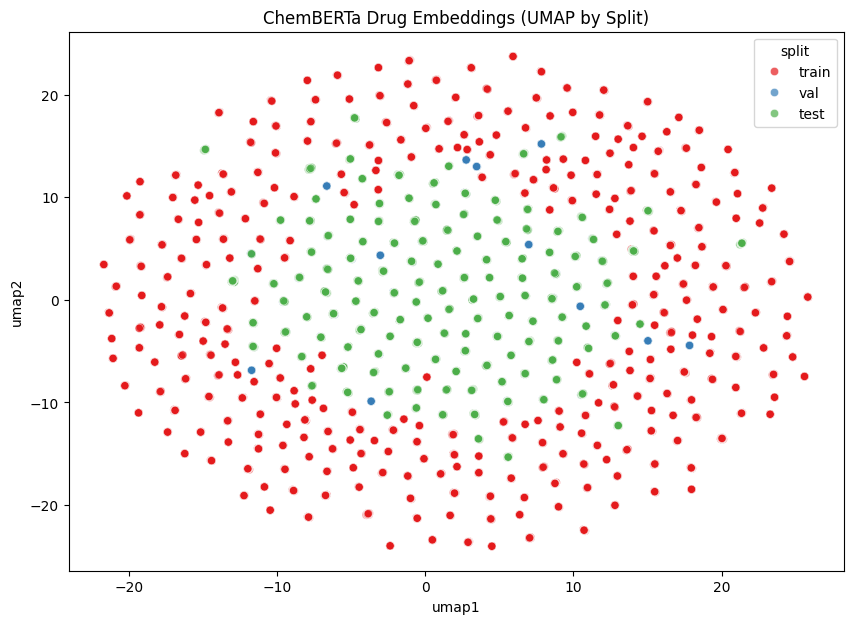

In [5]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

chemberta_embeddings = data["chemberta_embeddings"]
cluster_assignments = data["cluster_assignments"]

# Run UMAP
reducer = umap.UMAP(random_state=42)
emb_2d = reducer.fit_transform(chemberta_embeddings)

# Build DataFrame for plotting
df_all = pd.concat([df_train, df_val, df_test])
df_all["split"] = ["train"] * len(df_train) + ["val"] * len(df_val) + ["test"] * len(df_test)
df_all["umap1"] = emb_2d[:, 0]
df_all["umap2"] = emb_2d[:, 1]

# Plot by split
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_all, x="umap1", y="umap2", hue="split", palette="Set1", alpha=0.7)
plt.title("ChemBERTa Drug Embeddings (UMAP by Split)")
plt.show()


In [1]:
import pickle
import os

# Load from previously saved ChemBERTa split
with open("/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl/chemberta_cluster_split.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val   = data["X_val"]
X_test  = data["X_test"]

df_train = data["df_train"].reset_index(drop=True)
df_val   = data["df_val"].reset_index(drop=True)
df_test  = data["df_test"].reset_index(drop=True)

# Build pairs for each split
train_pairs = [{"embedding": emb, "smiles": smi} for emb, smi in zip(X_train, df_train["SMILES"])]
val_pairs   = [{"embedding": emb, "smiles": smi} for emb, smi in zip(X_val, df_val["SMILES"])]
test_pairs  = [{"embedding": emb, "smiles": smi} for emb, smi in zip(X_test, df_test["SMILES"])]

# Save directory
save_dir = "/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/correct .pkl"

# Save each
with open(os.path.join(save_dir, "train_pairs.pkl"), "wb") as f:
    pickle.dump(train_pairs, f)

with open(os.path.join(save_dir, "val_pairs.pkl"), "wb") as f:
    pickle.dump(val_pairs, f)

with open(os.path.join(save_dir, "test_pairs.pkl"), "wb") as f:
    pickle.dump(test_pairs, f)

print("✅ Saved train_pairs.pkl, val_pairs.pkl, and test_pairs.pkl")


✅ Saved train_pairs.pkl, val_pairs.pkl, and test_pairs.pkl


### run flamingo pipeline

#### installs

In [1]:
!pip install anndata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.8 MB/s eta 0:00:00


In [2]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 110.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [3]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 26.6 MB/s eta 0:00:00


In [4]:
!pip install deeplife-mlinfra


ERROR: Could not find a version that satisfies the requirement deeplife-mlinfra (from versions: none)
ERROR: No matching distribution found for deeplife-mlinfra


#### scripts

In [5]:
%%writefile scgpt_smiles_model.py

import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import anndata
import scanpy as sc
import os
import numpy as np
from typing import Dict, List, Optional, Tuple, Union
import math
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

from molgpt_loader import load_mol_gpt_model


# Model Components
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(0)]

class DoublePositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        # Use the full embedding dimension divided into two halves
        self.d_model = d_model
        half_dim = d_model // 2

        # Create position encodings for both input and output positions
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, half_dim, 2) * (-math.log(10000.0) / half_dim))

        # Input position encodings
        pe_input = torch.zeros(max_len, half_dim)
        pe_input[:, 0::2] = torch.sin(position * div_term)
        pe_input[:, 1::2] = torch.cos(position * div_term)

        # Output position encodings
        pe_output = torch.zeros(max_len, half_dim)
        pe_output[:, 0::2] = torch.sin(position * div_term)
        pe_output[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe_input', pe_input)
        self.register_buffer('pe_output', pe_output)

    def forward(self, x, input_positions, output_positions):
        batch_size, seq_length, _ = x.shape

        # Create a tensor of zeros with the same shape as the input
        pos_encoding = torch.zeros_like(x)

        # For each item in the batch
        for b in range(batch_size):
            for t in range(seq_length):
                # Get the input and output positions for this token
                input_pos = input_positions[b, t] if input_positions is not None else t
                output_pos = output_positions[b, t] if output_positions is not None else t

                if input_pos < self.pe_input.size(0) and output_pos < self.pe_output.size(0):
                    # Fill the first half with input position encoding
                    pos_encoding[b, t, :self.d_model//2] = self.pe_input[input_pos]
                    # Fill the second half with output position encoding
                    pos_encoding[b, t, self.d_model//2:] = self.pe_output[output_pos]

        return x + pos_encoding

class PerceiverAttention(nn.Module):
    def __init__(self, dim, dim_head=64, heads=8):
        super().__init__()
        self.scale = dim_head ** -0.5
        self.heads = heads
        inner_dim = dim_head * heads

        self.norm_media = nn.LayerNorm(dim)
        self.norm_latents = nn.LayerNorm(dim)
        self.to_q = nn.Linear(dim, inner_dim, bias=False)
        self.to_kv = nn.Linear(dim, inner_dim * 2, bias=False)
        self.to_out = nn.Linear(inner_dim, dim, bias=False)

    def forward(self, x, latents):
        """
        x: [batch_size, seq_len_x, dim]
        latents: [batch_size, seq_len_l, dim]
        """
        batch_size = x.shape[0]

        x = self.norm_media(x)
        latents = self.norm_latents(latents)

        # Ensure latents has correct batch size
        if latents.size(0) != batch_size:
            latents = latents.expand(batch_size, -1, -1)

        q = self.to_q(latents)
        # Handle rearrange function
        q = q.view(batch_size, -1, self.heads, q.size(-1) // self.heads).transpose(1, 2)
        q = q * self.scale

        # Ensure proper concatenation
        kv_input = torch.cat((x, latents), dim=1)  # concatenate along sequence dimension
        k, v = self.to_kv(kv_input).chunk(2, dim=-1)
        # Handle rearrange function
        k = k.view(batch_size, -1, self.heads, k.size(-1) // self.heads).transpose(1, 2)
        v = v.view(batch_size, -1, self.heads, v.size(-1) // self.heads).transpose(1, 2)

        sim = torch.einsum('b h i d, b h j d -> b h i j', q, k)
        attn = sim.softmax(dim=-1)
        out = torch.einsum('b h i j, b h j d -> b h i d', attn, v)
        # Handle rearrange function
        out = out.transpose(1, 2).contiguous().view(batch_size, -1, self.heads * out.size(-1))

        return self.to_out(out)

class GatedCrossAttentionBlock(nn.Module):
    def __init__(self, dim, dim_head=64, heads=8, ff_mult=4):
        super().__init__()
        self.attn = PerceiverAttention(dim=dim, dim_head=dim_head, heads=heads)
        self.attn_gate = nn.Parameter(torch.tensor([0.]))
        self.ff = FeedForward(dim, mult=ff_mult)
        self.ff_gate = nn.Parameter(torch.tensor([0.]))

    def forward(self, x, media):
        """
        x: [batch_size, seq_len_x, dim]
        media: [batch_size, seq_len_m, dim]
        """
        batch_size = x.shape[0]
        target_batch_size = media.size(0)

        # Handle batch size mismatch
        if batch_size > target_batch_size:
            media = media.expand(batch_size, -1, -1)
        elif batch_size < target_batch_size:
            x = x.expand(target_batch_size, -1, -1)

        gate = self.attn_gate.tanh()
        x = self.attn(media, x) * gate + x
        x = self.ff(x) * self.ff_gate.tanh() + x
        return x

class PerceiverResampler(nn.Module):
    def __init__(self, dim, depth, dim_head=64, heads=8, num_latents=64):
        super().__init__()
        # Initialize latents without batch dimension
        self.latents = nn.Parameter(torch.randn(num_latents, dim))
        self.layers = nn.ModuleList([])

        for _ in range(depth):
            self.layers.append(nn.ModuleList([
                PerceiverAttention(dim=dim, dim_head=dim_head, heads=heads),
                FeedForward(dim=dim)
            ]))

    def forward(self, x):
        batch_size = x.shape[0]
        if len(x.shape) == 2:
          x = x.unsqueeze(1)  # [batch_size, embedding_dim] -> [batch_size, 1, embedding_dim]

        # Expand latents to batch size (handle repeat function)
        latents = self.latents.unsqueeze(0).expand(batch_size, -1, -1)

        for attn, ff in self.layers:
            latents = attn(x, latents) + latents
            latents = ff(latents) + latents

        return latents

class FeedForward(nn.Module):
    def __init__(self, dim, mult=4):
        super().__init__()
        self.net = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, dim * mult, bias=False),
            nn.GELU(),
            nn.Linear(dim * mult, dim, bias=False)
        )

    def forward(self, x):
        return self.net(x)


from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Lipinski, QED
from rdkit.Chem import DataStructs
import numpy as np
from scipy.spatial.distance import cosine

class MoleculeMetrics:
    @staticmethod
    def is_valid_smiles(smiles):
        """Check if a SMILES string represents a valid molecule."""
        mol = Chem.MolFromSmiles(smiles)
        return mol is not None

    @staticmethod
    def tanimoto_similarity(smiles1, smiles2):
        """Calculate Tanimoto similarity between two SMILES strings."""
        mol1 = Chem.MolFromSmiles(smiles1)
        mol2 = Chem.MolFromSmiles(smiles2)

        if mol1 is None or mol2 is None:
            return 0.0

        fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=2048)
        fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=2048)

        return DataStructs.TanimotoSimilarity(fp1, fp2)

    @staticmethod
    def compute_fingerprint(smiles):
        """Compute Morgan fingerprint for a molecule."""
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)

    @staticmethod
    def fingerprint_to_numpy(fingerprint):
        """Convert RDKit fingerprint to numpy array."""
        if fingerprint is None:
            return None
        arr = np.zeros((1,))
        DataStructs.ConvertToNumpyArray(fingerprint, arr)
        return arr

    @staticmethod
    def calc_cosine_distance(fp1, fp2):
        """Calculate cosine distance between two fingerprints."""
        if fp1 is None or fp2 is None:
            return 1.0  # Maximum distance
        return cosine(fp1, fp2)

    @staticmethod
    def calculate_druglikeness_metrics(smiles):
        """Calculate druglikeness using Lipinski's Rule of 5 and QED."""
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return {
                'valid': 0,
                'mw': None,
                'logp': None,
                'hba': None,
                'hbd': None,
                'rotatable_bonds': None,
                'qed': None,
                'lipinski_violations': None,
                'rule_of_5': 0
            }

        # Calculate druglikeness properties
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        hba = Descriptors.NumHAcceptors(mol)
        hbd = Descriptors.NumHDonors(mol)
        rotatable_bonds = Descriptors.NumRotatableBonds(mol)
        qed = QED.qed(mol)

        # Count Lipinski violations
        lipinski_violations = 0
        if mw > 500: lipinski_violations += 1
        if logp > 5: lipinski_violations += 1
        if hba > 10: lipinski_violations += 1
        if hbd > 5: lipinski_violations += 1

        # Rule of 5 pass (0 or 1 violations is considered a pass)
        rule_of_5 = 1 if lipinski_violations <= 1 else 0

        return {
            'valid': 1,
            'mw': mw,
            'logp': logp,
            'hba': hba,
            'hbd': hbd,
            'rotatable_bonds': rotatable_bonds,
            'qed': qed,
            'lipinski_violations': lipinski_violations,
            'rule_of_5': rule_of_5
        }

    @staticmethod
    def evaluate_molecule_pair(ground_truth, generated):
        """Evaluate a pair of ground truth and generated SMILES strings."""
        # Validate molecules
        gt_valid = MoleculeMetrics.is_valid_smiles(ground_truth)
        gen_valid = MoleculeMetrics.is_valid_smiles(generated)

        # Calculate similarity if both are valid
        similarity = 0.0
        if gt_valid and gen_valid:
            similarity = MoleculeMetrics.tanimoto_similarity(ground_truth, generated)

        # Get druglikeness metrics for generated molecule
        gen_metrics = MoleculeMetrics.calculate_druglikeness_metrics(generated)

        # Create result dictionary
        result = {
            'ground_truth': ground_truth,
            'generated': generated,
            'gt_valid': 1 if gt_valid else 0,
            'gen_valid': 1 if gen_valid else 0,
            'tanimoto_similarity': similarity,
            **gen_metrics
        }

        return result

    @staticmethod
    def aggregate_metrics(results):
        """Aggregate metrics across multiple molecule pairs."""
        metrics = {
            'total_pairs': len(results),
            'gt_valid_ratio': np.mean([r['gt_valid'] for r in results]),
            'gen_valid_ratio': np.mean([r['gen_valid'] for r in results]),
            'avg_tanimoto': np.mean([r['tanimoto_similarity'] for r in results]),
            'avg_qed': np.mean([r['qed'] for r in results if r['qed'] is not None]),
            'rule_of_5_pass_ratio': np.mean([r['rule_of_5'] for r in results if r['rule_of_5'] is not None]),
            'avg_lipinski_violations': np.mean([r['lipinski_violations'] for r in results if r['lipinski_violations'] is not None])
        }

        # Calculate additional statistics
        valid_indices = [i for i, r in enumerate(results) if r['gen_valid'] == 1]
        if valid_indices:
            valid_results = [results[i] for i in valid_indices]
            metrics.update({
                'valid_molecules': len(valid_results),
                'avg_mw': np.mean([r['mw'] for r in valid_results]),
                'avg_logp': np.mean([r['logp'] for r in valid_results]),
                'avg_hba': np.mean([r['hba'] for r in valid_results]),
                'avg_hbd': np.mean([r['hbd'] for r in valid_results]),
                'avg_rotatable_bonds': np.mean([r['rotatable_bonds'] for r in valid_results])
            })

        return metrics


class SCGPTSmilesGPT(nn.Module):
    def __init__(self, max_len,
                 cross_attn_every=3, dim_head=64, heads=8,
                 perceiver_depth=2, perceiver_num_latents=64,
                 working_dir="./scgpt_smiles_workdir",
                 embedding_dim=512):
        super().__init__()

        # Load molGPT model
        self.smilesgpt_model, self.smilesgpt_tokenizer = load_mol_gpt_model()
        self.max_len = max_len
        self.working_dir = working_dir

        if self.smilesgpt_tokenizer.pad_token is None:
            self.smilesgpt_tokenizer.pad_token = self.smilesgpt_tokenizer.eos_token
            self.smilesgpt_model.config.pad_token_id = self.smilesgpt_model.config.eos_token_id

        self.cross_attn_every = cross_attn_every

        # Add projection layer to adapt scGPT embedding dimension to molGPT dimension if needed
        self.projection = nn.Linear(embedding_dim, self.smilesgpt_model.config.n_embd)

        self.positional_encoding = DoublePositionalEncoding(
            self.smilesgpt_model.config.n_embd,
            max_len=max_len
        )

        self.cell_perceiver = PerceiverResampler(
            dim=self.smilesgpt_model.config.n_embd,
            depth=perceiver_depth,
            dim_head=dim_head,
            heads=heads,
            num_latents=perceiver_num_latents
        )

        num_gpt_layers = len(self.smilesgpt_model.transformer.h)
        self.cross_attn = nn.ModuleList([
            GatedCrossAttentionBlock(
                dim=self.smilesgpt_model.config.n_embd,
                dim_head=dim_head,
                heads=heads
            )
            for _ in range(num_gpt_layers)
        ])

        # # Modified initialization with specific layer targeting
        # self.layers = nn.ModuleList()
        # num_layers = len(self.smilesgpt_model.transformer.h)
        # targeted_layers = [num_layers-2, num_layers-1]  # 11th and 12th layer (0-indexed)

        # for i, block in enumerate(self.smilesgpt_model.transformer.h):
        #     self.layers.append(block)
        #     if i in targeted_layers:
        #         print(f"Adding cross-attention after transformer layer {i+1}/{num_layers}")
        #         self.layers.append(
        #             GatedCrossAttentionBlock(
        #                 dim=self.smilesgpt_model.config.n_embd,
        #                 dim_head=dim_head,
        #                 heads=heads
        #             )
        #         )

        # # Add an additional cross-attention before LM head
        # print(f"Adding cross-attention before LM head")
        # self.final_cross_attn = GatedCrossAttentionBlock(
        #     dim=self.smilesgpt_model.config.n_embd,
        #     dim_head=dim_head,
        #     heads=heads
        # )

        # Replace this entire section in __init__
        self.layers = nn.ModuleList()
        for i, block in enumerate(self.smilesgpt_model.transformer.h):
            self.layers.append(block)
            # Don't add any cross-attention blocks here

        # Now add cross-attention blocks only after the specified layers
        num_layers = len(self.smilesgpt_model.transformer.h)
        layer_indices_for_cross_attn = [num_layers-2, num_layers-1]  # Last two layers

        for i in layer_indices_for_cross_attn:
            # Get the correct index in our layers list
            idx = i
            # Insert cross-attention after this layer
            print(f"Adding cross-attention after transformer layer {i+1}/{num_layers}")
            self.layers.insert(idx+1, GatedCrossAttentionBlock(
                dim=self.smilesgpt_model.config.n_embd,
                dim_head=dim_head,
                heads=heads
            ))

        # Add final cross-attention before LM head
        print(f"Adding cross-attention before LM head")
        self.final_cross_attn = GatedCrossAttentionBlock(
            dim=self.smilesgpt_model.config.n_embd,
            dim_head=dim_head,
            heads=heads
        )

    def forward(self, cell_embeddings, targets=None, optimize=False, order=None, use_masking=False):
        device = next(self.parameters()).device

        cell_embeddings = self.projection(cell_embeddings)
        processed_cells = self.cell_perceiver(cell_embeddings)

        batch_size = cell_embeddings.size(0)

        if use_masking and targets is not None:
            masked_inputs, mask = apply_masking(targets, self.smilesgpt_tokenizer)
            hidden_states = self.smilesgpt_model.transformer.wte(masked_inputs)
            seq_length = masked_inputs.size(1)

            attention_mask = torch.ones((batch_size, seq_length), device=device)
            pad_mask = (masked_inputs == self.smilesgpt_tokenizer.pad_token_id)
            attention_mask[pad_mask] = 0
        else:
            gpt_input = self.smilesgpt_tokenizer.encode_plus(
                "",
                return_tensors="pt",
                padding='max_length',
                max_length=self.max_len,
                truncation=True
            ).to(device)

            input_ids = gpt_input.input_ids.long()
            seq_length = input_ids.size(1)
            hidden_states = self.smilesgpt_model.transformer.wte(input_ids)
            attention_mask = gpt_input.attention_mask

            if not optimize and not use_masking:
                if order is None:
                    order = torch.arange(seq_length, device=device).unsqueeze(0).repeat(batch_size, 1)

                if order.size(1) > seq_length:
                    order = order[:, :seq_length]
                elif order.size(1) < seq_length:
                    padding = torch.arange(order.size(1), seq_length, device=device).unsqueeze(0).repeat(batch_size, 1)
                    order = torch.cat([order, padding], dim=1)

                reordered_input_ids = torch.zeros_like(input_ids)
                for b in range(batch_size):
                    reordered_input_ids[b] = input_ids[b, order[b]]

                hidden_states = self.smilesgpt_model.transformer.wte(reordered_input_ids)

        if order is None:
            order = torch.arange(seq_length, device=device).unsqueeze(0).repeat(batch_size, 1)

        input_positions = order
        output_positions = torch.roll(order, -1, dims=1)
        output_positions[:, -1] = order[:, 0]

        hidden_states = self.positional_encoding(hidden_states, input_positions, output_positions)

        num_heads = self.smilesgpt_model.config.n_head

        attention_mask = attention_mask.view(batch_size, 1, 1, seq_length)
        attention_mask = attention_mask.expand(batch_size, num_heads, seq_length, seq_length)
        attention_mask = attention_mask.to(dtype=hidden_states.dtype)

        seq_indices = torch.arange(seq_length, device=device)
        expanded_seq_indices_i = seq_indices.unsqueeze(1).expand(seq_length, seq_length)
        expanded_seq_indices_j = seq_indices.unsqueeze(0).expand(seq_length, seq_length)

        causal_mask = torch.zeros((batch_size, seq_length, seq_length), device=device)
        for b in range(batch_size):
            order_b = order[b]
            order_i = order_b[expanded_seq_indices_i]
            order_j = order_b[expanded_seq_indices_j]
            causal_mask[b] = (order_j <= order_i).float()

        if use_masking:
            combined_mask = attention_mask
        else:
            causal_mask = causal_mask.unsqueeze(1)
            combined_mask = attention_mask * causal_mask

        for i, layer in enumerate(self.layers):
            if isinstance(layer, GatedCrossAttentionBlock):
                hidden_states = layer(hidden_states, processed_cells)
            else:
                hidden_states = layer(hidden_states, attention_mask=combined_mask)[0]

        # Apply final cross-attention before LM head
        hidden_states = self.final_cross_attn(hidden_states, processed_cells)

        logits = self.smilesgpt_model.lm_head(hidden_states)

        if targets is None:
            if optimize:
                return logits[:, [-1], :], None
            return logits, None

        if targets is not None:
            if use_masking:
                loss = F.cross_entropy(
                    logits.view(-1, logits.size(-1)),
                    targets.view(-1),
                    ignore_index=self.smilesgpt_tokenizer.pad_token_id
                )
            else:
                shuffled_targets = torch.zeros_like(targets)
                for b in range(batch_size):
                    shuffled_targets[b] = targets[b, order[b]]

                loss = F.cross_entropy(
                    logits.view(-1, logits.size(-1)),
                    shuffled_targets.view(-1),
                    ignore_index=self.smilesgpt_tokenizer.pad_token_id
                )
        else:
            loss = None

        return logits, loss

    def generate_smiles(self, cell_embedding, max_length=200, top_p=0.95):
        device = next(self.parameters()).device

        if cell_embedding.dim() == 1:
            cell_embedding = cell_embedding.unsqueeze(0)


        print(f"Cell embeddings shape: {cell_embedding.shape}")

        # Project cell embeddings to match GPT embedding dimension if necessary
        cell_embedding = self.projection(cell_embedding)
        processed_cells = self.cell_perceiver(cell_embedding)

        # Start with BOS token
        input_ids = torch.tensor([[self.smilesgpt_tokenizer.bos_token_id]]).to(device)

        for _ in range(max_length):
            inputs_embeds = self.smilesgpt_model.transformer.wte(input_ids)
            inputs_embeds = self.positional_encoding(inputs_embeds, None, None)

            hidden_states = inputs_embeds

            for i, layer in enumerate(self.layers):
                if isinstance(layer, GatedCrossAttentionBlock):
                    hidden_states = layer(hidden_states, processed_cells)
                else:
                    hidden_states = layer(hidden_states, attention_mask=None)[0]

            next_token_logits = self.smilesgpt_model.lm_head(hidden_states[:, -1, :])

            filtered_logits = top_p_filtering(next_token_logits, top_p=top_p)
            probs = F.softmax(filtered_logits, dim=-1)
            next_token = torch.multinomial(probs, num_samples=1)

            input_ids = torch.cat([input_ids, next_token], dim=-1)

            if next_token.item() == self.smilesgpt_tokenizer.eos_token_id:
                break

        return self.smilesgpt_tokenizer.decode(input_ids[0], skip_special_tokens=True)

    def state_dict(self):
        state_dict = super().state_dict()
        state_dict['cell_perceiver'] = self.cell_perceiver.state_dict()
        state_dict['cross_attn'] = self.cross_attn.state_dict()
        return state_dict

    def load_state_dict(self, state_dict):
        cell_perceiver_state = state_dict.pop('cell_perceiver')
        cross_attn_state = state_dict.pop('cross_attn')

        super().load_state_dict(state_dict)

        self.cell_perceiver.load_state_dict(cell_perceiver_state)
        self.cross_attn.load_state_dict(cross_attn_state)


def prepare_all_drugs_dataset(adata_dir, smiles_path, tokenizer, max_length,
                           working_dir, batch_size=25):
    import scanpy as sc
    import pandas as pd

    # Load SMILES data
    smiles_df = pd.read_csv(smiles_path)

    all_pairs = []

    # Get all h5ad files in the directory
    drug_files = [f for f in os.listdir(adata_dir) if f.endswith('.h5ad')]
    print(f"Found {len(drug_files)} drug files in {adata_dir}")

    for drug_file in drug_files:
        drug_path = os.path.join(adata_dir, drug_file)
        try:
            # Extract drug name from filename
            import re
            # Regular expression to extract the drug name
            match = re.search(r'([A-Za-z0-9-]+)_block', drug_file)

            if match:
                drug_name = match.group(1)
            else:
                drug_name = None  # Or handle the case when no match is found
            print(f"Processing {drug_name} from {drug_file}")

            # Skip if drug not in SMILES data
            if not any(smiles_df['drug'] == drug_name):
                print(f"No SMILES data for {drug_name}, skipping")
                continue

            # Load the h5ad file with pre-computed embeddings
            drug_adata = sc.read_h5ad(drug_path)

            # Get the precomputed differential embedding
            diff_embedding = torch.tensor(drug_adata.obsm["X_scGPT"].mean(axis=0))

            # Get SMILES for this drug
            drug_smiles_df = smiles_df[smiles_df['drug'] == drug_name]

            for _, row in drug_smiles_df.iterrows():
                all_pairs.append(
                    SCGPTSmilesPair(
                        cell_embedding=diff_embedding,
                        smiles_string=row['SMILES']
                    )
                )

            print(f"Added {len(drug_smiles_df)} pairs for {drug_name}")

        except Exception as e:
            print(f"Error processing {drug_file}: {e}")
            continue

    print(f"Created a total of {len(all_pairs)} cell-SMILES pairs")
    return all_pairs


def top_p_filtering(logits, top_p=0.9, filter_value=-float('Inf')):
    sorted_logits, sorted_indices = torch.sort(logits, descending=True)
    cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)

    sorted_indices_to_remove = cumulative_probs > top_p
    sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
    sorted_indices_to_remove[..., 0] = 0

    indices_to_remove = sorted_indices[sorted_indices_to_remove]
    logits[indices_to_remove] = filter_value

    return logits


class SCGPTSmilesPair:
    def __init__(self, cell_embedding, smiles_string):
        self.cell_embedding = cell_embedding
        self.smiles_string = smiles_string


class CellSmilesDataset(torch.utils.data.Dataset):
    def __init__(self, pairs, tokenizer, max_length):
        self.pairs = pairs
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        pair = self.pairs[idx]

        smiles_encoding = self.tokenizer(
            pair["smiles"],
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "cell_embedding": torch.tensor(pair["embedding"], dtype=torch.float),
            "smiles_tokens": smiles_encoding.input_ids.squeeze(0),
            "attention_mask": smiles_encoding.attention_mask.squeeze(0)
        }



def collate_batch(batch):
    cell_embeddings = torch.stack([item["cell_embedding"] for item in batch])
    smiles_tokens = torch.stack([item["smiles_tokens"] for item in batch])
    attention_masks = torch.stack([item["attention_mask"] for item in batch])

    return {
        "cell_embeddings": cell_embeddings,
        "smiles_tokens": smiles_tokens,
        "attention_masks": attention_masks
    }


def apply_masking(input_ids, tokenizer, mask_probability=0.15):
    """
    Apply masked language modeling to the input tokens.
    Uses 'M' as a mask token if no mask token is defined.

    Args:
        input_ids (torch.Tensor): Input token IDs of shape [batch_size, seq_len]
        tokenizer: The tokenizer
        mask_probability (float): Probability of masking a token

    Returns:
        torch.Tensor: Masked input IDs
        torch.Tensor: Mask indicating which positions were masked
    """
    # Make a copy of the input_ids
    masked_input_ids = input_ids.clone()
    batch_size, seq_len = input_ids.shape
    device = input_ids.device

    # Create a mask for tokens that can be masked (exclude padding and special tokens)
    pad_token_id = tokenizer.pad_token_id
    eos_token_id = tokenizer.eos_token_id
    bos_token_id = tokenizer.bos_token_id

    # Get mask token ID or create one using 'M'
    if hasattr(tokenizer, 'mask_token_id') and tokenizer.mask_token_id is not None:
        mask_token_id = tokenizer.mask_token_id
    else:
        # Try to get ID for 'M' token or use a fallback token
        try:
            # Get token ID for 'M' (assuming this is unused in SMILES)
            mask_token_id = tokenizer.convert_tokens_to_ids('M')
            # If the tokenizer returns a special "unknown" value, use a different approach
            if mask_token_id == tokenizer.unk_token_id:
                # Try to get a token ID by encoding
                mask_encoded = tokenizer.encode('M', add_special_tokens=False)
                if mask_encoded:
                    mask_token_id = mask_encoded[0]
                else:
                    # Last resort: use a random token ID that's not a special token
                    # This is just for training purposes, it doesn't have to be meaningful
                    mask_token_id = 10  # Arbitrary token ID
                    print('WARNING: USING ARBITRARY 10 TOKEN')
        except:
            # If all else fails, use a fallback token ID
            mask_token_id = 10  # Arbitrary token ID
            print('WARNING: USING ARBITRARY 10 TOKEN')

    special_tokens = torch.tensor([pad_token_id, eos_token_id, bos_token_id], device=device)
    mask_candidates = ~torch.isin(input_ids, special_tokens)

    # Randomly select tokens to mask based on mask_probability
    rand = torch.rand(input_ids.shape, device=device)
    mask = (rand < mask_probability) & mask_candidates

    # Apply mask token to selected positions
    masked_input_ids[mask] = mask_token_id

    return masked_input_ids, mask

Writing scgpt_smiles_model.py


In [6]:
%%writefile improved_training.py


import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import anndata
import scanpy as sc
import os
import numpy as np
from typing import Dict, List, Optional, Tuple, Union
import math
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

from molgpt_loader import load_mol_gpt_model

from model_freezing import (
    freeze_model_layers, print_trainable_parameters,
    gradual_unfreezing_schedule
)

from scgpt_smiles_model import (
    GatedCrossAttentionBlock
)



def train_scgpt_smiles_gpt_improved(model, train_loader, val_loader, num_epochs, device,
                           l2_reg=1e-5, learning_rate=1e-4, checkpoints_dir="/content/drive/MyDrive/Colab Notebooks/esm cell state/",
                           use_mlm=True, use_gradual_unfreezing=True, mlm_probability=0.15):
    """
    Improved training function with support for MLM and gradual unfreezing

    Args:
        model: The SCGPTSmilesGPT model
        train_loader: DataLoader for training data
        val_loader: DataLoader for validation data
        num_epochs: Number of training epochs
        device: Device to train on (cuda/cpu)
        l2_reg: L2 regularization strength
        learning_rate: Learning rate
        checkpoints_dir: Directory to save checkpoints
        use_mlm: Whether to use masked language modeling
        use_gradual_unfreezing: Whether to gradually unfreeze layers
        mlm_probability: Probability for token masking in MLM
    """
    os.makedirs(checkpoints_dir, exist_ok=True)

    # Start with all layers frozen except the cross-attention, perceiver, and projection layers
    if use_gradual_unfreezing:
        freeze_model_layers(model, freeze_all=True,
                           unfreeze_layers=['projection', 'cell_perceiver', 'cross_attn', 'lm_head'])
        print("Initial trainable parameters:")
        print_trainable_parameters(model)

    optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()),
                                 lr=learning_rate, weight_decay=l2_reg)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)

    best_val_loss = float('inf')
    training_log = []

    for epoch in range(num_epochs):
        # Update which layers are trainable based on current epoch
        if use_gradual_unfreezing:
            gradual_unfreezing_schedule(model, epoch, num_epochs)
            print(f"\nEpoch {epoch+1}/{num_epochs} - Trainable parameters:")
            print_model_structure_and_trainable_status(model)

            # Recreate optimizer with updated trainable parameters
            optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()),
                                        lr=learning_rate, weight_decay=l2_reg)
            scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs - epoch)

        model.train()
        total_loss = 0
        total_correct = 0
        total_tokens = 0

        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            cell_embeddings = batch["cell_embeddings"].to(device)
            smiles_tokens = batch["smiles_tokens"].to(device)

            optimizer.zero_grad()

            # Alternate between MLM and autoregressive training if both are used
            use_masking_this_batch = False # use_mlm and (epoch % 2 == 0)

            outputs, loss = model(cell_embeddings, targets=smiles_tokens,
                                 use_masking=use_masking_this_batch)

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()

            predicted_token_ids = torch.argmax(outputs, dim=-1)
            mask = smiles_tokens != model.smilesgpt_tokenizer.pad_token_id
            correct = (predicted_token_ids[mask] == smiles_tokens[mask]).sum().item()

            total = mask.sum().item()
            total_correct += correct
            total_tokens += total

        avg_loss = total_loss / len(train_loader)
        token_accuracy = total_correct / total_tokens * 100
        perplexity = math.exp(avg_loss)

        print(f"\nEpoch {epoch+1}/{num_epochs}, Avg Loss: {avg_loss:.4f}, Perplexity: {perplexity:.4f}")
        print(f"Token Accuracy: {token_accuracy:.2f}%")

        val_loss, val_perplexity, val_accuracy = validate_model(model, val_loader, device)
        print(f"Validation Loss: {val_loss:.4f}, Perplexity: {val_perplexity:.4f}, Accuracy: {val_accuracy:.2f}%")

        training_log.append({
            'epoch': epoch+1,
            'train_loss': avg_loss,
            'train_perplexity': perplexity,
            'train_accuracy': token_accuracy,
            'val_loss': val_loss,
            'val_perplexity': val_perplexity,
            'val_accuracy': val_accuracy
        })

        # # Every 5 epochs, generate some samples to check quality
        # if epoch % 5 == 0 or epoch == num_epochs - 1:
        #     print("\nGenerating sample SMILES strings:")
        #     # Get a few random samples from the validation set
        #     sample_indices = np.random.choice(len(val_loader.dataset),
        #                                      min(3, len(val_loader.dataset)),
        #                                      replace=False)
        #     for idx in sample_indices:
        #         sample = val_loader.dataset[idx]
        #         cell_embedding = sample["cell_embedding"].unsqueeze(0).to(device)
        #         ground_truth = model.smilesgpt_tokenizer.decode(sample["smiles_tokens"])

        #         generated = model.generate_smiles(cell_embedding)

        #         print(f"Ground truth: {ground_truth}")
        #         print(f"Generated: {generated}")
        #         print(f"Valid molecule: {MoleculeMetrics.is_valid_smiles(generated)}")
        #         print("-" * 40)

        checkpoint_path = os.path.join(checkpoints_dir, f"scgptsmilesgpt_epoch_{epoch+1}.pth")
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), checkpoint_path)
            print(f"Checkpoint saved at {checkpoint_path} (Validation loss improved)")

        scheduler.step()

    loss_df = pd.DataFrame(training_log)
    loss_df.to_csv(os.path.join(checkpoints_dir, "training_log.csv"), index=False)

    return loss_df



def generate_and_evaluate_improved(model, test_data, device=None):
    """
    Generate SMILES strings and evaluate them using comprehensive metrics

    Args:
        model: The trained model
        test_data: Test dataset
        device: Device to run inference on
    """
    if device is None:
        device = next(model.parameters()).device

    model.eval()
    results = []

    for pair in tqdm(test_data, desc="Generating SMILES"):
        cell_embedding = pair.cell_embedding.to(device)
        ground_truth = pair.smiles_string

        generated_smiles = model.generate_smiles(cell_embedding)

        # Evaluate using comprehensive metrics
        result = MoleculeMetrics.evaluate_molecule_pair(ground_truth, generated_smiles)
        results.append(result)

    # Aggregate metrics
    aggregate_metrics = MoleculeMetrics.aggregate_metrics(results)

    print("\nEvaluation Results:")
    for metric_name, value in aggregate_metrics.items():
        print(f"{metric_name}: {value:.4f}")

    return results, aggregate_metrics


def print_model_structure_and_trainable_status(model):
    print("\n=== MODEL STRUCTURE AND TRAINABLE STATUS ===")

    # DETAILED TRANSFORMER LAYERS ANALYSIS
    print("\n--- GPT Transformer Layers ---")
    # Directly access the transformer layers for accurate count
    num_layers = len(model.smilesgpt_model.transformer.h)
    print(f"Total GPT transformer layers: {num_layers}")

    for i, layer in enumerate(model.smilesgpt_model.transformer.h):
        trainable = all(param.requires_grad for param in layer.parameters())
        print(f"GPT Layer {i}: Trainable = {trainable}")

    # CROSS-ATTENTION ANALYSIS
    print("\n--- Cross-Attention Blocks ---")
    cross_attn_count = 0
    for name, module in model.named_modules():
        if isinstance(module, GatedCrossAttentionBlock):
            cross_attn_count += 1
            trainable = all(param.requires_grad for param in module.parameters())
            print(f"Cross-Attention Block {cross_attn_count}: Trainable = {trainable}")

            location = "Unknown location"
            if 'layers' in name:
                try:
                    index = int(name.split('.')[1])
                    location = f"After layer index {index}"
                except:
                    location = f"In layers (exact position unclear): {name}"
            elif 'final_cross_attn' in name:
                location = "Before LM head"

            print(f"  Location: {location}")
            print(f"  Full path: {name}")

    # LM HEAD ANALYSIS
    print("\n--- LM Head ---")
    lm_head_trainable = all(param.requires_grad for param in model.smilesgpt_model.lm_head.parameters())
    print(f"LM Head: Trainable = {lm_head_trainable}")

    # PARAMETER SUMMARY
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"\nTotal Parameters: {total_params:,}")
    print(f"Trainable Parameters: {trainable_params:,} ({trainable_params/total_params:.2%})")

    # Print details about what's happening in gradual_unfreezing_schedule
    print("\n--- Unfreezing Target Details ---")
    num_gpt_layers = len(model.smilesgpt_model.transformer.h)
    print(f"Total GPT layers found: {num_gpt_layers}")
    print(f"Layers targeted for unfreezing: {num_gpt_layers-2} and {num_gpt_layers-1}")


def validate_model(model, val_loader, device):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_tokens = 0

    with torch.no_grad():
        for batch in val_loader:
            cell_embeddings = batch["cell_embeddings"].to(device)
            smiles_tokens = batch["smiles_tokens"].to(device)

            outputs, loss = model(cell_embeddings, targets=smiles_tokens)

            total_loss += loss.item()

            predicted_token_ids = torch.argmax(outputs, dim=-1)
            mask = smiles_tokens != model.smilesgpt_tokenizer.pad_token_id
            correct = (predicted_token_ids[mask] == smiles_tokens[mask]).sum().item()

            total = mask.sum().item()
            total_correct += correct
            total_tokens += total

    avg_loss = total_loss / len(val_loader)
    token_accuracy = total_correct / total_tokens * 100
    perplexity = math.exp(avg_loss)

    return avg_loss, perplexity, token_accuracy




Writing improved_training.py


In [7]:
%%writefile evaluation_visualization.py

from scgpt_smiles_model import (
    GatedCrossAttentionBlock
)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import os


def visualize_training_metrics(log_df, save_path=None):
    """Visualize training and validation metrics over epochs."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Plot loss
    axes[0, 0].plot(log_df['epoch'], log_df['train_loss'], label='Training')
    axes[0, 0].plot(log_df['epoch'], log_df['val_loss'], label='Validation')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Loss vs. Epoch')
    axes[0, 0].legend()

    # Plot perplexity
    axes[0, 1].plot(log_df['epoch'], log_df['train_perplexity'], label='Training')
    axes[0, 1].plot(log_df['epoch'], log_df['val_perplexity'], label='Validation')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Perplexity')
    axes[0, 1].set_title('Perplexity vs. Epoch')
    axes[0, 1].legend()

    # Plot accuracy
    axes[1, 0].plot(log_df['epoch'], log_df['train_accuracy'], label='Training')
    axes[1, 0].plot(log_df['epoch'], log_df['val_accuracy'], label='Validation')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Token Accuracy (%)')
    axes[1, 0].set_title('Token Accuracy vs. Epoch')
    axes[1, 0].legend()

    # Plot learning rate if available
    if 'learning_rate' in log_df.columns:
        axes[1, 1].plot(log_df['epoch'], log_df['learning_rate'])
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Learning Rate')
        axes[1, 1].set_title('Learning Rate Schedule')
    else:
        axes[1, 1].axis('off')

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()


def visualize_molecular_properties(results_df, save_dir=None):
    """Visualize distributions of molecular properties."""
    # Filter to valid molecules only
    valid_df = results_df[results_df['gen_valid'] == 1].copy()

    if len(valid_df) == 0:
        print("No valid molecules to visualize properties")
        return

    # Create a figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Plot molecular weight distribution
    sns.histplot(valid_df['mw'], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Molecular Weight Distribution')
    axes[0, 0].set_xlabel('Molecular Weight (Da)')
    axes[0, 0].axvline(500, color='red', linestyle='--')  # Lipinski threshold

    # Plot logP distribution
    sns.histplot(valid_df['logp'], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title('LogP Distribution')
    axes[0, 1].set_xlabel('LogP')
    axes[0, 1].axvline(5, color='red', linestyle='--')  # Lipinski threshold

    # Plot QED distribution
    sns.histplot(valid_df['qed'], kde=True, ax=axes[0, 2])
    axes[0, 2].set_title('QED Distribution')
    axes[0, 2].set_xlabel('QED (Drug-likeness)')

    # Plot H-bond acceptors
    sns.histplot(valid_df['hba'], kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('H-Bond Acceptors')
    axes[1, 0].set_xlabel('Number of H-Bond Acceptors')
    axes[1, 0].axvline(10, color='red', linestyle='--')  # Lipinski threshold

    # Plot H-bond donors
    sns.histplot(valid_df['hbd'], kde=True, ax=axes[1, 1])
    axes[1, 1].set_title('H-Bond Donors')
    axes[1, 1].set_xlabel('Number of H-Bond Donors')
    axes[1, 1].axvline(5, color='red', linestyle='--')  # Lipinski threshold

    # Plot Lipinski violations
    sns.countplot(x='lipinski_violations', data=valid_df, ax=axes[1, 2])
    axes[1, 2].set_title('Lipinski Rule Violations')
    axes[1, 2].set_xlabel('Number of Violations')

    plt.tight_layout()

    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(os.path.join(save_dir, 'molecular_properties.png'))
        plt.close()
    else:
        plt.show()


def visualize_molecule_similarity(results_df, save_dir=None, num_examples=5):
    """Visualize ground truth and generated molecule pairs with similarity scores."""
    # Filter to valid molecules only
    valid_pairs = results_df[(results_df['gt_valid'] == 1) & (results_df['gen_valid'] == 1)].copy()

    if len(valid_pairs) == 0:
        print("No valid molecule pairs to visualize")
        return

    # Sort by similarity
    valid_pairs = valid_pairs.sort_values('tanimoto_similarity', ascending=False)

    # Get molecules for top matches
    top_pairs = valid_pairs.head(num_examples)

    # Create molecules
    gt_mols = [Chem.MolFromSmiles(smiles) for smiles in top_pairs['ground_truth']]
    gen_mols = [Chem.MolFromSmiles(smiles) for smiles in top_pairs['generated']]

    # Create figure to display pairs
    fig, axes = plt.subplots(num_examples, 2, figsize=(10, 4 * num_examples))

    for i in range(num_examples):
        if i < len(top_pairs):
            similarity = top_pairs.iloc[i]['tanimoto_similarity']

            if num_examples == 1:
                ax1, ax2 = axes
            else:
                ax1, ax2 = axes[i]

            # Draw molecules
            img1 = Draw.MolToImage(gt_mols[i], size=(300, 300))
            img2 = Draw.MolToImage(gen_mols[i], size=(300, 300))

            ax1.imshow(img1)
            ax1.set_title(f"Ground Truth")
            ax1.axis('off')

            ax2.imshow(img2)
            ax2.set_title(f"Generated (Similarity: {similarity:.2f})")
            ax2.axis('off')

    plt.tight_layout()

    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(os.path.join(save_dir, 'molecule_similarity.png'))
        plt.close()
    else:
        plt.show()


def visualize_fingerprint_space(results_df, save_dir=None, max_molecules=100):
    """Visualize the distribution of ground truth and generated molecules in fingerprint space."""
    # Filter to valid molecules only
    valid_pairs = results_df[(results_df['gt_valid'] == 1) & (results_df['gen_valid'] == 1)].copy()

    if len(valid_pairs) == 0:
        print("No valid molecule pairs to visualize")
        return

    # Limit the number of molecules to avoid overcrowding
    if len(valid_pairs) > max_molecules:
        valid_pairs = valid_pairs.sample(max_molecules, random_state=42)

    # Generate fingerprints
    from rdkit import Chem
    from rdkit.Chem import AllChem

    gt_smiles = valid_pairs['ground_truth'].tolist()
    gen_smiles = valid_pairs['generated'].tolist()

    gt_fps = []
    gen_fps = []

    for gt, gen in zip(gt_smiles, gen_smiles):
        gt_mol = Chem.MolFromSmiles(gt)
        gen_mol = Chem.MolFromSmiles(gen)

        gt_fp = AllChem.GetMorganFingerprintAsBitVect(gt_mol, 2, nBits=2048)
        gen_fp = AllChem.GetMorganFingerprintAsBitVect(gen_mol, 2, nBits=2048)

        # Convert fingerprints to numpy arrays
        gt_array = np.zeros((1,))
        gen_array = np.zeros((1,))
        AllChem.DataStructs.ConvertToNumpyArray(gt_fp, gt_array)
        AllChem.DataStructs.ConvertToNumpyArray(gen_fp, gen_array)

        gt_fps.append(gt_array)
        gen_fps.append(gen_array)

    # Combine fingerprints for dimensionality reduction
    all_fps = np.vstack(gt_fps + gen_fps)

    # Use PCA for initial dimensionality reduction to avoid t-SNE on high-dim data
    pca = PCA(n_components=50)
    all_fps_pca = pca.fit_transform(all_fps)

    # Apply t-SNE for visualization
    tsne = TSNE(n_components=2, random_state=42)
    all_fps_tsne = tsne.fit_transform(all_fps_pca)

    # Split back to ground truth and generated
    n = len(gt_fps)
    gt_tsne = all_fps_tsne[:n]
    gen_tsne = all_fps_tsne[n:]

    # Plot
    plt.figure(figsize=(10, 8))
    plt.scatter(gt_tsne[:, 0], gt_tsne[:, 1], label='Ground Truth', alpha=0.7)
    plt.scatter(gen_tsne[:, 0], gen_tsne[:, 1], label='Generated', alpha=0.7)

    # Connect corresponding molecules with lines
    for i in range(len(gt_tsne)):
        plt.plot([gt_tsne[i, 0], gen_tsne[i, 0]], [gt_tsne[i, 1], gen_tsne[i, 1]], 'k-', alpha=0.2)

    plt.legend()
    plt.title('t-SNE Visualization of Molecular Fingerprints')

    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(os.path.join(save_dir, 'fingerprint_space.png'))
        plt.close()
    else:
        plt.show()

Writing evaluation_visualization.py


In [8]:
%%writefile model_freezing.py


from scgpt_smiles_model import (
    GatedCrossAttentionBlock
)
def freeze_model_layers(model, freeze_all=True, unfreeze_layers=None):
    """
    Freeze or unfreeze specific layers of the model

    Args:
        model: The neural network model
        freeze_all: Whether to freeze all parameters initially
        unfreeze_layers: List of layer names to unfreeze
    """
    # First freeze or unfreeze all parameters
    for param in model.parameters():
        param.requires_grad = not freeze_all

    if unfreeze_layers:
        # Unfreeze specific layers
        for name, param in model.named_parameters():
            if any(layer_name in name for layer_name in unfreeze_layers):
                param.requires_grad = True

def print_trainable_parameters(model):
    """
    Print the number and percentage of trainable parameters
    """
    trainable_params = 0
    all_params = 0

    for name, param in model.named_parameters():
        all_params += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()

    print(f"Trainable parameters: {trainable_params:,} ({trainable_params / all_params:.1%})")
    return trainable_params, all_params

# def gradual_unfreezing_schedule(model, epoch, total_epochs):
#     """
#     Implements a gradual unfreezing schedule based on current epoch

#     Args:
#         model: The neural network model
#         epoch: Current epoch
#         total_epochs: Total number of epochs
#     """
#     # Start by freezing everything
#     for param in model.parameters():
#         param.requires_grad = False

#     # Calculate how many GPT layers should be unfrozen
#     num_gpt_layers = len(model.smilesgpt_model.transformer.h)

#     # ORIGINAL GRADUAL UNFREEZING CODE (commented out)
#     '''
#     # Determine how many layers to unfreeze based on current epoch
#     if epoch < total_epochs // 4:
#         # First quarter: Only unfreeze the last GPT layer
#         layers_to_unfreeze = 1
#     elif epoch < total_epochs // 2:
#         # Second quarter: Unfreeze the last 25% of GPT layers
#         layers_to_unfreeze = max(1, num_gpt_layers // 4)
#     elif epoch < 3 * total_epochs // 4:
#         # Third quarter: Unfreeze the last 50% of GPT layers
#         layers_to_unfreeze = max(1, num_gpt_layers // 2)
#     else:
#         # Last quarter: Unfreeze all layers
#         layers_to_unfreeze = num_gpt_layers

#     # Unfreeze the last N GPT layers
#     for i in range(num_gpt_layers - layers_to_unfreeze, num_gpt_layers):
#         for param in model.smilesgpt_model.transformer.h[i].parameters():
#             param.requires_grad = True
#     '''

#     # NEW CODE: ONLY UNFREEZE LAST TWO LAYERS
#     # Unfreeze only the last two transformer layers regardless of epoch
#     for i in range(num_gpt_layers - 2, num_gpt_layers):
#         for param in model.smilesgpt_model.transformer.h[i].parameters():
#             param.requires_grad = True

#     # Always unfreeze the projection, perceiver, and cross-attention blocks
#     for param in model.projection.parameters():
#         param.requires_grad = True

#     for param in model.cell_perceiver.parameters():
#         param.requires_grad = True

#     # Unfreeze all cross-attention blocks
#     for name, module in model.named_modules():
#         if isinstance(module, GatedCrossAttentionBlock):
#             for param in module.parameters():
#                 param.requires_grad = True

#     # Unfreeze LM head
#     for param in model.smilesgpt_model.lm_head.parameters():
#         param.requires_grad = True

#     # Unfreeze final cross-attention if it exists
#     if hasattr(model, 'final_cross_attn'):
#         for param in model.final_cross_attn.parameters():
#             param.requires_grad = True




def gradual_unfreezing_schedule(model, epoch, total_epochs):
    # Start by freezing everything
    for param in model.parameters():
        param.requires_grad = False

    # Get number of GPT layers
    num_gpt_layers = len(model.smilesgpt_model.transformer.h)

    # Unfreeze ONLY the last two transformer layers
    last_two_indices = [num_gpt_layers - 2, num_gpt_layers - 1]
    for i in last_two_indices:
        for param in model.smilesgpt_model.transformer.h[i].parameters():
            param.requires_grad = True

    # Unfreeze critical components
    for param in model.projection.parameters():
        param.requires_grad = True

    for param in model.cell_perceiver.parameters():
        param.requires_grad = True

    # Unfreeze all cross-attention blocks
    for name, module in model.named_modules():
        if isinstance(module, GatedCrossAttentionBlock):
            for param in module.parameters():
                param.requires_grad = True

    # Unfreeze LM head
    for param in model.smilesgpt_model.lm_head.parameters():
        param.requires_grad = True

Writing model_freezing.py


In [9]:
%%writefile scgpt_smiles_main.py

import torch
import torch.nn as nn
import argparse
import os
import pandas as pd
import scanpy as sc
from torch.utils.data import DataLoader
import sys
import numpy as np
import pickle

# Make sure the paths are available
sys.path.append(os.path.dirname(os.path.abspath(__file__)))

from scgpt_smiles_model import (
    SCGPTSmilesGPT, SCGPTSmilesPair, CellSmilesDataset,
    collate_batch, apply_masking, MoleculeMetrics
)

from model_freezing import (
    freeze_model_layers, print_trainable_parameters,
    gradual_unfreezing_schedule
)

from improved_training import (
    train_scgpt_smiles_gpt_improved,
    generate_and_evaluate_improved, validate_model, print_model_structure_and_trainable_status
)

from evaluation_visualization import (
    visualize_training_metrics, visualize_molecular_properties,
    visualize_molecule_similarity, visualize_fingerprint_space
)

from molgpt_loader import load_mol_gpt_model

from scgpt_smiles_model import (
    GatedCrossAttentionBlock
)


def main():
    parser = argparse.ArgumentParser(description="Train and evaluate scGPT to SMILES model with improvements")
    parser.add_argument("--processed_data_dir", type=str, default="/content/drive/MyDrive/Colab Notebooks/esm cell state/scgpt_workdir",
                        help="Directory with processed data files")
    parser.add_argument("--batch_size", type=int, default=16, help="Batch size for training")
    parser.add_argument("--max_length", type=int, default=512, help="Maximum sequence length")
    parser.add_argument("--num_epochs", type=int, default=20, help="Number of training epochs")
    parser.add_argument("--learning_rate", type=float, default=5e-5, help="Learning rate")
    parser.add_argument("--l2_reg", type=float, default=1e-5, help="L2 regularization")
    parser.add_argument("--cross_attn_every", type=int, default=3, help="Cross attention frequency")
    parser.add_argument("--perceiver_depth", type=int, default=2, help="Perceiver depth")
    parser.add_argument("--seed", type=int, default=42, help="Random seed")
    parser.add_argument("--checkpoints_dir", type=str, default="./checkpoints", help="Checkpoints directory")
    parser.add_argument("--eval_only", action="store_true", help="Run evaluation only")
    parser.add_argument("--checkpoint_path", type=str, help="Path to checkpoint for evaluation")
    parser.add_argument("--embedding_dim", type=int, default=512, help="Dimension of scGPT embeddings")

    # New arguments for improvements
    parser.add_argument("--use_mlm", action="store_true", help="Use Masked Language Modeling")
    parser.add_argument("--mlm_probability", type=float, default=0.15, help="Probability for MLM masking")
    parser.add_argument("--use_gradual_unfreezing", action="store_true", help="Use gradual unfreezing strategy")
    parser.add_argument("--vis_dir", type=str, default="./visualizations", help="Directory for visualizations")

    args = parser.parse_args()

    torch.manual_seed(args.seed)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Load molGPT tokenizer
    _, tokenizer = load_mol_gpt_model()

    # Create the model
    model = SCGPTSmilesGPT(
        max_len=args.max_length,
        cross_attn_every=args.cross_attn_every,
        perceiver_depth=args.perceiver_depth,
        working_dir=args.processed_data_dir,
        embedding_dim=args.embedding_dim
    ).to(device)

    print("Initial model structure:")
    print_model_structure_and_trainable_status(model)

    # Create directories
    os.makedirs(args.checkpoints_dir, exist_ok=True)
    os.makedirs(args.vis_dir, exist_ok=True)

    # File paths for loading processed data
    train_pairs_file = os.path.join(args.processed_data_dir, "train_pairs.pkl")
    val_pairs_file = os.path.join(args.processed_data_dir, "val_pairs.pkl")
    test_pairs_file = os.path.join(args.processed_data_dir, "test_pairs.pkl")

    print("Loading pre-processed data...")
    with open(train_pairs_file, 'rb') as f:
        train_pairs = pickle.load(f)
    with open(val_pairs_file, 'rb') as f:
        val_pairs = pickle.load(f)
    with open(test_pairs_file, 'rb') as f:
        test_pairs = pickle.load(f)

    print(f"Loaded {len(train_pairs)} training, {len(val_pairs)} validation, and {len(test_pairs)} test pairs")

    # Create datasets and dataloaders
    train_dataset = CellSmilesDataset(train_pairs, tokenizer, args.max_length)
    val_dataset = CellSmilesDataset(val_pairs, tokenizer, args.max_length)
    test_dataset = CellSmilesDataset(test_pairs, tokenizer, args.max_length)

    train_loader = DataLoader(
        train_dataset,
        batch_size=args.batch_size,
        shuffle=True,
        collate_fn=collate_batch,
        num_workers=2
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=args.batch_size,
        shuffle=False,
        collate_fn=collate_batch,
        num_workers=2
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=args.batch_size,
        shuffle=False,
        collate_fn=collate_batch,
        num_workers=2
    )

    # For evaluation only mode
    if args.eval_only and args.checkpoint_path:
        print(f"Loading checkpoint from {args.checkpoint_path}")
        model.load_state_dict(torch.load(args.checkpoint_path, map_location=device))

        print("Generating and evaluating SMILES...")
        results, aggregate_metrics = generate_and_evaluate_improved(model, test_pairs, device)

        # Convert results to DataFrame
        results_df = pd.DataFrame(results)
        results_path = os.path.join(args.checkpoints_dir, "evaluation_results.csv")
        results_df.to_csv(results_path, index=False)
        print(f"Evaluation results saved to {results_path}")

        # Generate visualizations
        visualize_molecular_properties(results_df, save_dir=args.vis_dir)
        visualize_molecule_similarity(results_df, save_dir=args.vis_dir)
        visualize_fingerprint_space(results_df, save_dir=args.vis_dir)

        # Save metrics to a JSON file
        import json
        with open(os.path.join(args.checkpoints_dir, "metrics.json"), 'w') as f:
            json.dump(aggregate_metrics, f, indent=4)

    else:
        print(f"Training for {args.num_epochs} epochs")
        print(f"Using MLM: {args.use_mlm}, MLM Probability: {args.mlm_probability}")
        print(f"Using Gradual Unfreezing: {args.use_gradual_unfreezing}")

        log_df = train_scgpt_smiles_gpt_improved(
            model=model,
            train_loader=train_loader,
            val_loader=val_loader,
            num_epochs=args.num_epochs,
            device=device,
            l2_reg=args.l2_reg,
            learning_rate=args.learning_rate,
            checkpoints_dir=args.checkpoints_dir,
            use_mlm=args.use_mlm,
            use_gradual_unfreezing=args.use_gradual_unfreezing,
            mlm_probability=args.mlm_probability
        )

        # Visualize training progress
        visualize_training_metrics(log_df, save_path=os.path.join(args.vis_dir, "training_curves.png"))

        # Find the best checkpoint
        best_epoch = log_df.iloc[log_df['val_loss'].argmin()]['epoch']
        best_checkpoint = os.path.join(args.checkpoints_dir, f"scgptsmilesgpt_epoch_{int(best_epoch)}.pth")

        print(f"Loading best checkpoint from epoch {int(best_epoch)}")
        model.load_state_dict(torch.load(best_checkpoint, map_location=device))

        # # Final evaluation
        # print("Performing final evaluation...")
        # results, aggregate_metrics = generate_and_evaluate_improved(model, test_pairs, device)

        # # Convert results to DataFrame
        # results_df = pd.DataFrame(results)
        # results_path = os.path.join(args.checkpoints_dir, "evaluation_results.csv")
        # results_df.to_csv(results_path, index=False)

        # # Generate visualizations
        # visualize_molecular_properties(results_df, save_dir=args.vis_dir)
        # visualize_molecule_similarity(results_df, save_dir=args.vis_dir)
        # visualize_fingerprint_space(results_df, save_dir=args.vis_dir)

        # # Save metrics to a JSON file
        # import json
        # with open(os.path.join(args.checkpoints_dir, "metrics.json"), 'w') as f:
        #     json.dump(aggregate_metrics, f, indent=4)


if __name__ == "__main__":
    main()

Writing scgpt_smiles_main.py


#### run lines

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
# os.chdir("/content/drive/MyDrive/Colab Notebooks/esm cell state/")
os.chdir("/content/")

In [13]:
!ls "/content/"

drive			     improved_training.py  molgpt_loader.py  scgpt_smiles_main.py
evaluation_visualization.py  model_freezing.py	   sample_data	     scgpt_smiles_model.py


In [ ]:
# !python scgpt_smiles_main.py --adata_dir "/content/drive/MyDrive/Colab Notebooks/esm cell state/difference counts/" \
# --smiles_path "/content/drive/MyDrive/Colab Notebooks/esm cell state/smiles_df.csv" \
# --working_dir "/content/drive/MyDrive/Colab Notebooks/esm cell state/scgpt_workdir" \
# --batch_size 1 --max_length 256 --num_epochs 10 --learning_rate 1e-5 \
# --checkpoints_dir "/content/drive/MyDrive/Colab Notebooks/esm cell state/checkpoints"


!python scgpt_smiles_main.py \
  --processed_data_dir "/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/run1_codes" \
  --use_mlm \
  --use_gradual_unfreezing \
  --num_epochs 30 \
  --learning_rate 3e-5 \
  --batch_size 1





## note to self --> cross attn is every 3 but only last two is unfrozen, so like the flamingo for plastics, we should just add cross attn for the end 2

2025-03-25 22:10:06.754724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742940606.774673    5377 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742940606.780686    5377 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-25 22:10:06.800847: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using device: cuda
tokenizer_config.json: 100% 146/146 [00:00<00:00, 764kB/s]
tokenizer.json: 100% 1.50M/1.50M [00:00<00:00, 

In [ ]:
!ls  "/content/drive/MyDrive/Colab Notebooks/esm cell state/codebasev2/run1_codes"

#### drug embeddings

##### mol-gpt

In [10]:
%%writefile molgpt_loader.py
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

def load_mol_gpt_model():
    """
    Load the molGPT model from Hugging Face.
    """
    model_name = "msb-roshan/molgpt"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForCausalLM.from_pretrained(model_name)

    # Make sure we have a padding token
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token
        model.config.pad_token_id = model.config.eos_token_id

    return model, tokenizer

if __name__ == "__main__":
    # Test the model loading
    print("Loading molGPT model...")
    model, tokenizer = load_mol_gpt_model()

    # Print model and tokenizer info
    print(f"Model type: {type(model)}")
    print(f"Model config: {model.config}")
    print(f"Tokenizer vocab size: {tokenizer.vocab_size}")
    print(f"Special tokens: {tokenizer.all_special_tokens}")

    # Test generating a molecule
    print("\nGenerating a molecule...")
    input_text = "C"  # Start with carbon atom
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids

    # Generate
    with torch.no_grad():
        output = model.generate(
            input_ids,
            max_length=50,
            num_return_sequences=1,
            do_sample=True,
            top_p=0.95,
            temperature=0.7,
            pad_token_id=tokenizer.pad_token_id,
            eos_token_id=tokenizer.eos_token_id
        )

    # Decode and print
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    print(f"Generated SMILES: {generated_text}")

    # Try to import RDKit for validation
    try:
        from rdkit import Chem
        mol = Chem.MolFromSmiles(generated_text)
        if mol:
            print("Generated a valid molecule!")
        else:
            print("Generated string is not a valid SMILES.")
    except ImportError:
        print("RDKit not available for validation.")

Writing molgpt_loader.py
